# Patrones con K means

In [83]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [84]:
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [85]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [86]:
data.groupby('year').size()

year
2015    5615
2016    5616
2017    5722
2018    1296
dtype: int64

1. Visualización

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_15988\1040973082.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['year'],1).hist(color = 'darkseagreen')


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

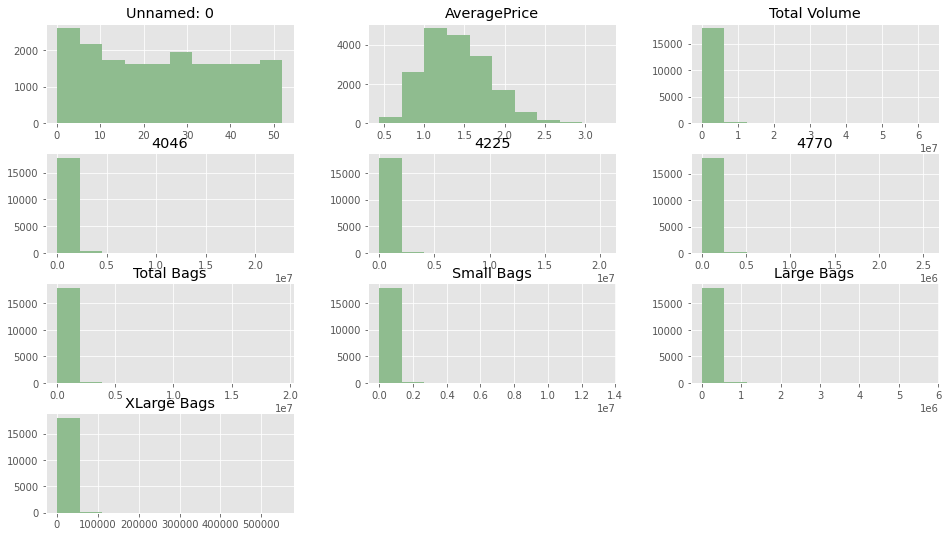

In [87]:
data.drop(['year'],1).hist(color = 'darkseagreen')

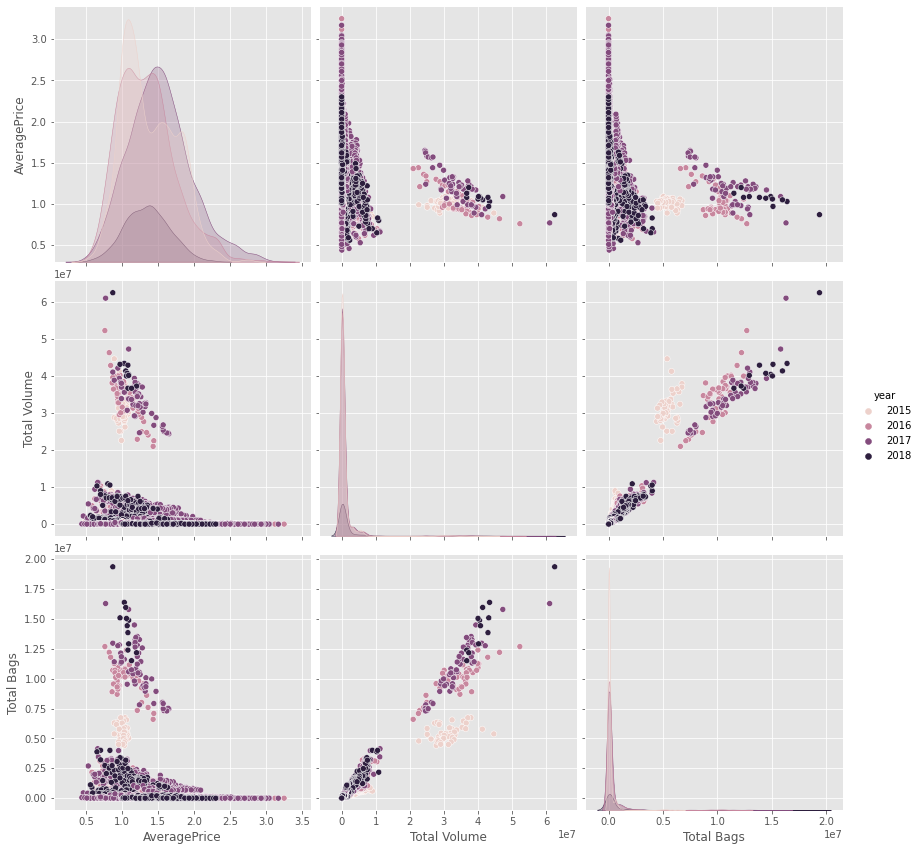

In [88]:
sb.pairplot(data.dropna(), hue = 'year', height = 4, vars = ['AveragePrice', 'Total Volume', 'Total Bags'], kind = 'scatter')

2. Definición de la entrada

In [89]:
X = np.array(data[['AveragePrice', 'Total Volume', 'Total Bags']])
Y = np.array(data['year'])
X.shape

(18249, 3)

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_15988\789986760.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


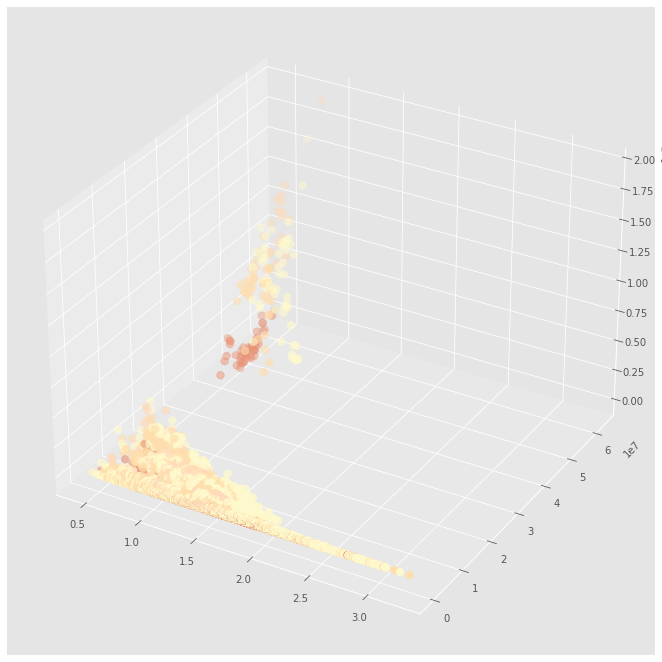

In [90]:
fig = plt.figure()
ax = Axes3D(fig)
colores = ['darksalmon','navajowhite','lemonchiffon', 'peachpuff']
asignar = []
for row in Y:
    asignar.append(colores[row - 2015])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60)

3. Obteniendo el valor K

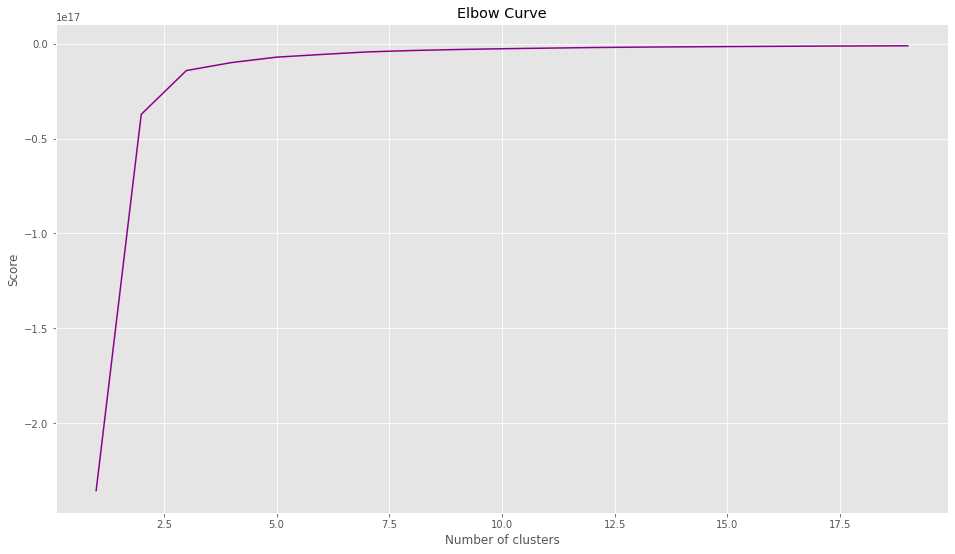

In [91]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range (len(kmeans))]
score
plt.plot(Nc, score, color = 'darkmagenta')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

4. Ejecución de K-Means

In [92]:
kmeans = KMeans(n_clusters = 3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[1.43340863e+00, 2.40087076e+05, 7.20529553e+04],
       [1.09201183e+00, 3.37350390e+07, 9.19049275e+06],
       [1.09325653e+00, 4.45007684e+06, 1.23738713e+06]])

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_15988\2162874263.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


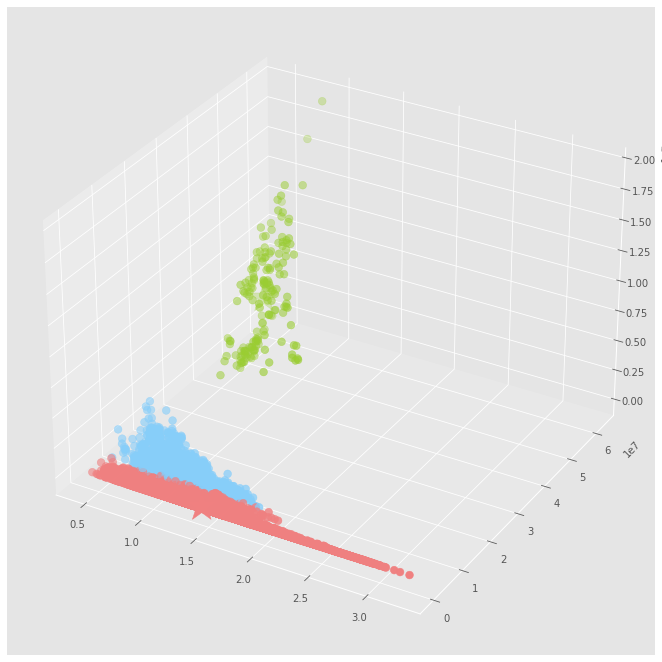

In [101]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['lightcoral','yellowgreen','lightskyblue']
asignar = []
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000)

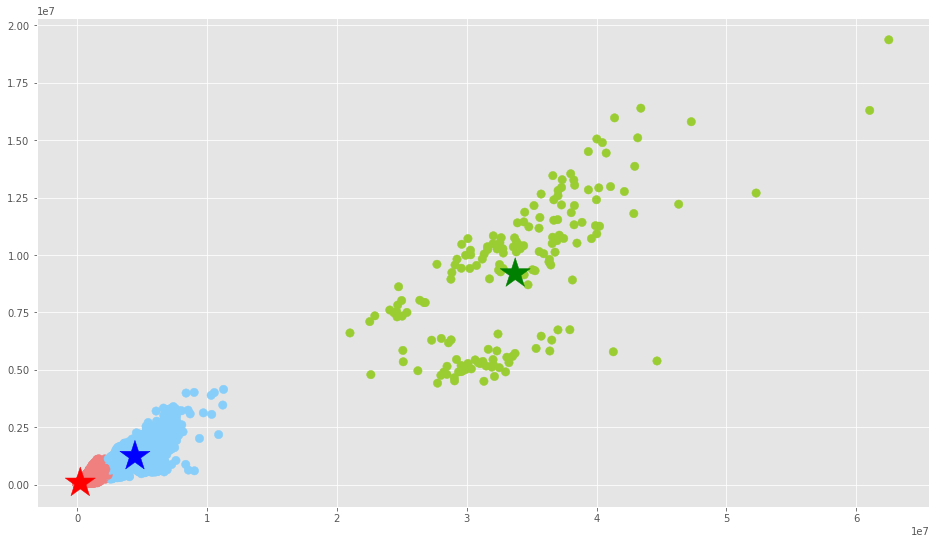

In [94]:
f1 = data['Total Volume'].values
f2 = data['Total Bags'].values

plt.scatter(f1, f2, c = asignar, s = 70)
plt.scatter(C[:, 1], C[:, 2], marker = '*', c = ['red', 'green', 'blue'], s = 1000)
plt.show()

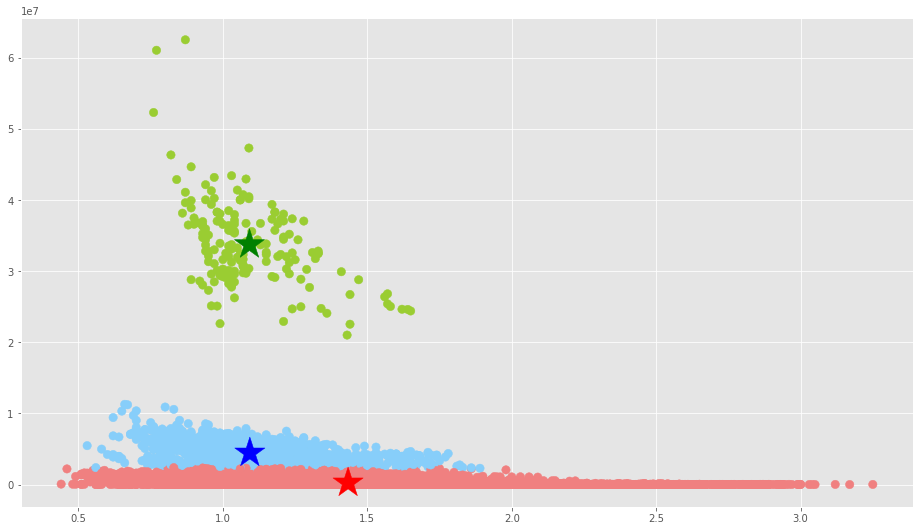

In [95]:
f1 = data['AveragePrice'].values
f2 = data['Total Volume'].values

plt.scatter(f1, f2, c = asignar, s= 70)
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = ['red','green', 'blue'], s = 1000)

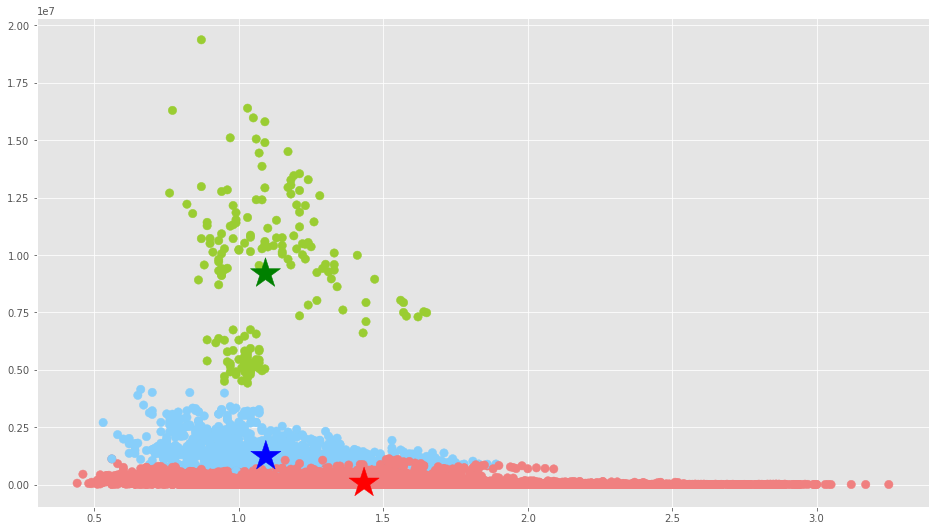

In [96]:
f1 = data['AveragePrice'].values
f2 = data['Total Bags'].values

plt.scatter(f1, f2, c = asignar, s= 70)
plt.scatter(C[:, 0], C[:, 2], marker = '*', c = ['red', 'green', 'blue'], s = 1000)

In [97]:
copy = pd.DataFrame()
copy['AveragePrice'] = data['AveragePrice'].values
copy['year'] = data['year'].values
copy['label'] = labels
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,lightcoral,16778
1,yellowgreen,169
2,lightskyblue,1302


In [98]:
group_referr_index = copy['label'] == 0
group_referrals = copy[group_referr_index]

diversidadGrupo = pd.DataFrame()
diversidadGrupo['year'] = [2015,2016,2017,2018]
diversidadGrupo['cantidad'] = group_referrals.groupby('AveragePrice').size()
diversidadGrupo

,year,cantidad
0,2015,NaN
1,2016,143.0
2,2017,59.0
3,2018,2.0


In [102]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([4190, 5498, 1532], dtype=int64)